<a href="https://www.kaggle.com/code/chethuhn/sms-spam-classifier?scriptVersionId=134249507" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sms-spam-collection-dataset/spam.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns


In [3]:
df=pd.read_csv("/kaggle/input/sms-spam-collection-dataset/spam.csv",sep=",",encoding="ISO-8859-1")
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [4]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [5]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis=1,inplace=True)

In [6]:
df.rename({"v1":"label","v2":"message"},axis=1,inplace=True)
df

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [7]:
## To check the the dataset is Balanced or Imbalaced 
df["label"].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

<Axes: xlabel='label', ylabel='count'>

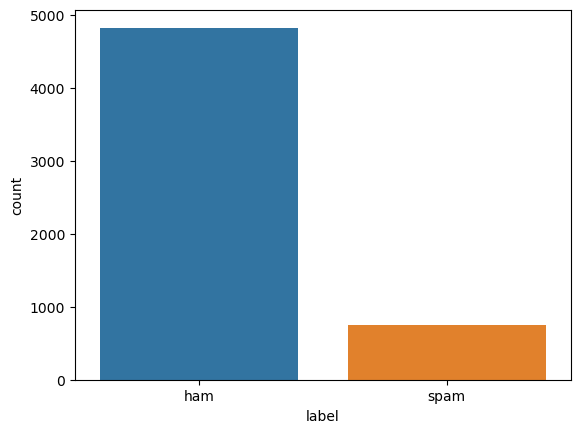

In [8]:
sns.countplot(x=df["label"],)

from the above plot we can see that dataset is imbalanced

In [9]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import *

import re

In [10]:
corpus=[]
stemmer=PorterStemmer()

In [11]:
corpus=[]
for i in range(len(df['message'])):
    review=re.sub('[^a-zA-Z]',' ',df['message'][i]) ## First remove the non word characters
    review=review.lower()
    review=review.split()
    review=[stemmer.stem(word) for word in review if not word in stopwords.words("english")]
    review=" ".join(review)
    corpus.append(review)

In [12]:
corpus[5]

'freemsg hey darl week word back like fun still tb ok xxx std chg send rcv'

## Bag of Words Model for Text representation of independenet feature

In [13]:
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features=5000) 
## we are just trying top 5000 Words,then we can tune it accoring to accuracy and other matrix
X = vectorizer.fit_transform(corpus).toarray()

In [14]:
## This is Sparsed Matrix of Dependent features 
X,X.shape

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]),
 (5572, 5000))

In [15]:
df["label"].unique()

array(['ham', 'spam'], dtype=object)

#### We treansformed the dependent features but our Indpendent(Target) feature is yet to be converted into numerical.
 - Because this column has only 2 Categories we can try one-Hot Encoding or pd.get_dummies


In [16]:
y=pd.get_dummies(df["label"])

In [17]:
y

,ham,spam
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0
...,...,...
5567,0,1
5568,1,0
5569,1,0
5570,1,0


We can drop one column because we can predict both results in one column only and we can do that in pd.get_dummies function

In [18]:
## Now we are getting the Spam Column into the model
y=pd.get_dummies(df["label"],drop_first=True)
y

,spam
0,0
1,0
2,1
3,0
4,0
...,...
5567,1
5568,0
5569,0
5570,0


## Gaussian Naive Bayes


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [61]:
## To get unique values in test data and total size of test data
y_test.value_counts(),len(y_test)


(spam
 0       1453
 1        219
 dtype: int64,
 1672)

In [62]:
from sklearn.metrics import *

acc=accuracy_score(y_test, y_pred)
cm=confusion_matrix(y_test, y_pred)
a=precision_recall_fscore_support(y_test, y_pred, average='binary')

print(f'Gaussian Naive Bayes Model is Giving These metrics after Text "Representation by BOW Model", \n\n Accuracy of this model is {acc} ,\n\n Confusion Matrix for this model \n\n{cm}, \n\n Precision,Recall,F-1 score for Binary Average of data are \n\n{a} \n\n')
target_names = ['ham', 'spam']
report = classification_report(y_test, y_pred, target_names=target_names,labels=None)

print(f"Classification report for this model \n\n{report}")

Gaussian Naive Bayes Model is Giving These metrics after Text "Representation by BOW Model", 

 Accuracy of this model is 0.8654306220095693 ,

 Confusion Matrix for this model 

[[1255  198]
 [  27  192]], 

 Precision,Recall,F-1 score for Binary Average of data are 

(0.49230769230769234, 0.8767123287671232, 0.6305418719211823, None) 


Classification report for this model 

              precision    recall  f1-score   support

         ham       0.98      0.86      0.92      1453
        spam       0.49      0.88      0.63       219

    accuracy                           0.87      1672
   macro avg       0.74      0.87      0.77      1672
weighted avg       0.92      0.87      0.88      1672



1. Precision: It measures the proportion of correctly predicted instances out of the total predicted instances for each class.

2. Recall: It measures the proportion of correctly predicted instances out of the total actual instances for each class.

3. F1-score: It is the harmonic mean of precision and recall and provides a balanced measure of a classifier's performance.

4. Support: It represents the number of instances in each class.

5. Accuracy: It indicates the overall accuracy of the classifier.
### 'binary' average:
If your focus is solely on evaluating the performance of identifying spam instances, you can use the 'binary' average. This average calculates the F1 score specifically for the positive class (spam) while treating the negative class as non-spam. It is suitable if your primary concern is the accuracy of spam detection.

### 'macro' or 'weighted' average: 
If you want to evaluate the model's performance across both spam and non-spam classes, you can use the 'macro' or 'weighted' average. The 'macro' average treats both classes equally, while the 'weighted' average takes into account class imbalance and varying sample sizes. These averages provide an overall assessment of the model's performance, considering both precision and recall for both classes.

### Reason for Changes in Precision and recall for each average 

When you change the average parameter in the F1 score calculation, it can affect the precision and recall values, which in turn impacts the resulting F1 score. Here's why the precision and recall may change when you switch between different averaging options:

### 1. 'binary' average:

Precision and recall are calculated specifically for the positive class (as specified by pos_label), treating the negative class as non-positive
.
Precision: The proportion of true positive predictions out of all positive predictions. Only predictions related to the positive class are considered.

Recall: The proportion of true positive predictions out of all actual positive instances. Only instances related to the positive class are considered.

### 2. 'macro' average:

Precision and recall are calculated independently for each class and then averaged.

Precision: The average of precision values calculated for each class.

Recall: The average of recall values calculated for each class.
### 3. 'weighted' average:

Precision and recall are calculated independently for each class and then weighted by the number of samples in each class before averaging.

Precision: The weighted average of precision values, considering the class imbalance.

Recall: The weighted average of recall values, considering the class imbalance.
When you switch between these averaging options, the way precision and recall are computed changes, leading to potential variations in their values. 

The choice of averaging option can affect how much weight is given to each class and how the contributions of different classes are combined to calculate the final precision and recall values.

It's worth noting that depending on the class distribution and the performance of your model, different averaging options may result in different F1 scores. It's important to interpret and consider the implications of each average in the context of your specific problem and the evaluation requirements you have.

#### We are getting the 86% , if we provide "spam" column as the "Target(y)" Column, we can change the column for "ham" and will check for accuracy, because , the ham frequency is greater than spam

In [ ]:
df

In [ ]:
## Now we are getting the Spam Column into the model
y=pd.get_dummies(df["label"],drop_first=True)
y

In [ ]:
## To check the accuracy of model changes if we provide 1 for spam
y.replace([0,1],[1,0],inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred),confusion_matrix(y_test, y_pred)

### We are getting the  accuracy of 86% so we have to tune the parameters , we can do this by changing the 
- stemming into lemmatisation  
- max_features(Top Features) in the model
- changing BOW model into TF-IDF Model

In [ ]:
## Now we are getting the Spam Column into the model
y=pd.get_dummies(df["label"],drop_first=True)
y

## We are checking for TF-IDF model

In [ ]:
from sklearn.feature_extraction.text import *
vectorizer =TfidfVectorizer(max_features=3000) 
## we are just trying top 5000 Words,then we can tune it accoring to accuracy and other matrix
X = vectorizer.fit_transform(corpus).toarray()

In [ ]:
X

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
accuracy_score(y_test, y_pred),confusion_matrix(y_test, y_pred)

### By changing the features and Text Representation(Encoding) Model we are able to increase the accuracy of 2%

- Lets change the model and check

## Multinomial Naive Bayes

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import *
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)
mnb = MultinomialNB ()
y_pred = mnb.fit(X_train, y_train).predict(X_test)
accuracy_score(y_test, y_pred),confusion_matrix(y_test, y_pred)

### We are getting better results in Multinomial Naive Bayes Model, lets check for other algorithms also

### Complement Naive Bayes

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import *
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)
cnb = ComplementNB()
y_pred = cnb.fit(X_train, y_train).predict(X_test)
accuracy_score(y_test, y_pred),confusion_matrix(y_test, y_pred)

#### We are getting accuracy of 92% which is below multinominal naive bayes model

###  Bernoulli Naive Bayes

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import *
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)
bnb = BernoulliNB()
y_pred = bnb.fit(X_train, y_train).predict(X_test)
accuracy_score(y_test, y_pred),confusion_matrix(y_test, y_pred)

### we are getting better results from  Bernoulli Naive Bayes Model which is giving 97.78%, so we are finalising this model 

### But  lets see we can increase accuracy and decrease False positives and False Negatives little bit by changing text representation part from stemming into lemmatization

In [ ]:
nltk.download('wordnet')

In [ ]:
!pip install wordnet

In [ ]:
from nltk.corpus import wordnet
nltk.corpus.wordnet
#from wordnet import Dictionary
nltk.download('wordnet')
## To unzip the corpora wordnet
!unzip /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora/

In [ ]:
from nltk.stem import WordNetLemmatizer
corpus=[]
wnl=WordNetLemmatizer()

for i in range(len(df)):
    review=re.sub('[^a-zA-Z]'," ",df["message"][i])
    review=review.lower().split()
    review=[wnl.lemmatize(word) for word in review if not word in stopwords.words('english')]
    review=" ".join(review)
    corpus.append(review)

In [ ]:
from sklearn.feature_extraction.text import *
model=CountVectorizer(max_features=6000)
X=model.fit_transform(corpus).toarray()
X,X.shape


In [ ]:
y

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import *
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)
bnb = BernoulliNB()
y_pred = bnb.fit(X_train, y_train).predict(X_test)
accuracy_score(y_test, y_pred),confusion_matrix(y_test, y_pred)

## Accuracy for this model is 97.78%

## Conclusion

 1. for this dataset the Text representation Model TF-IDF is giving Better results than Bag of Words Model
 2. The Bernoulli Naive Bayes  Model is giving Best results 
 3. Optimal Number of Top features in the text representation is 6000
 